# Código do trabalho 4 de Aprendizado de Máquina - parte 2

In [1]:
# Bibliotecas
import numpy as np
import h5py
import os 
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# Diretório raiz. Precisa apontar para o local onde estão os arquivos de dados
os.chdir('/srv/ML2018/T4-2018')

In [3]:
# Função que lê os dados nos arquivos fornecidos.
def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5','r')
    train_set_x_orig = np.array(train_dataset["train_set_x"][ : ])   # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][ : ])   # your train set labels
    
    test_dataset = h5py.File("test_catvnoncat.h5","r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][ : ])      # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][ : ])      # your test set labels
    
    classes = np.array(test_dataset["list_classes"][:])              # the list of classes 
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return(train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes)
    

In [4]:
# Carregar as imagens nos conjuntos de treinamento e teste
train_x, train_y, test_x, test_y, classes = load_dataset()


[0]


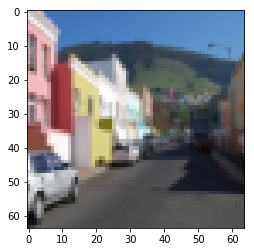

In [5]:
# Visualizar amostra de imagens
plt.imshow(train_x[1])
print(train_y[:,1])

In [6]:
# Gerar mais dados
train_x2 = np.flip(train_x, 2)
train_y2 = train_y

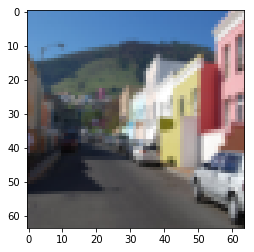

In [7]:
# Visualizar amostra de imagens
plt.imshow(train_x2[1])

In [8]:
train_x3 = np.concatenate((train_x, train_x2), axis=0)
train_y3 = np.concatenate((train_y, train_y2), axis=1)

[1]


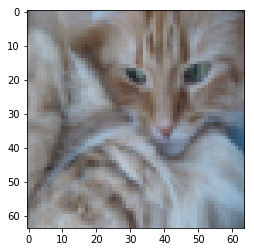

In [9]:
# Visualizar amostra de imagens
plt.imshow(train_x3[211])
print(train_y3[:,211])

In [10]:
# Normalização 
train_x = train_x / 255
test_x = test_x /255
#train_y = train_y / 255
#test_y = test_y /255


In [11]:
# Dimensões das imagens
print(np.shape(train_x))

(209, 64, 64, 3)


In [12]:
# Obter dimensões
train_x_shape = np.shape(train_x)
test_x_shape = np.shape(test_x)
ntrain = train_x_shape[0]
ntest = test_x_shape[0]
nrows = train_x_shape[1]
ncols = train_x_shape[2]
nchannels = train_x_shape[3]
print("Imagens (n train): ",ntrain)
print("largura: ",nrows)
print("altura: ",ncols)
print("canais: ",nchannels)
print("Imagens (n test): ",ntest)


Imagens (n train):  209
largura:  64
altura:  64
canais:  3
Imagens (n test):  50


In [13]:
# Reformatar os dados (reshape)
train_x_flat = train_x.flatten().reshape(ntrain, nrows * ncols * nchannels)
test_x_flat = test_x.flatten().reshape(ntest, nrows * ncols * nchannels)
train_y_cat = keras.utils.to_categorical(train_y[0], 2)
test_y_cat = keras.utils.to_categorical(test_y[0], 2)

## Primeira parte: Treinar uma rede completamente conectada de uma única camada oculta e com uma camada de saı́da de duas unidades com softmax

## Segunda parte: Treinar uma rede convolucional.

In [14]:
# Definir o modelo
model = keras.Sequential()

# Camada Convolucional
model.add(keras.layers.Conv2D(64, (3,3), input_shape=(nrows, ncols, nchannels), 
                              use_bias=True, activation='relu'))
#model.add(keras.layers.Conv2D(16, (3,3), activation='relu'))
#model.add(keras.layers.Conv2D(16, (3,3), activation='relu'))
#model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(keras.layers.Dropout(0.25))

#model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
#model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(keras.layers.Dropout(0.25))

# Max pooling
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

# Camada "flattening"
model.add(keras.layers.Flatten())

# Camada Fully Connected:
#model.add(keras.layers.Dense(1024, activation='relu', 
#                             bias_initializer=keras.initializers.he_normal(seed=5),
#                             bias_regularizer=keras.regularizers.l2(0.0001) ))

model.add(keras.layers.Dense(128, activation='relu'))

#model.add(keras.layers.Dense(512, activation='relu', 
#                             bias_initializer=keras.initializers.he_normal(seed=None),
#                             bias_regularizer=keras.regularizers.l2(0.0001) ))

# Softmax com duas saídas:
model.add(keras.layers.Dense(2, activation='softmax'))

# Sigmopide
#model.add(keras.layers.Dense(1, activation='sigmoid'))


In [15]:
# sgd = keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
# model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])

#rms = keras.optimizers.RMSprop(lr=0.0001)
#model.compile(loss='binary_crossentropy', optimizer=rms, metrics=['binary_accuracy'])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [16]:
model.summary()
model.fit(train_x, train_y_cat, epochs=20)

#eval_train = model.fit(train_x, train_y_cat[:,0], epochs=10)

#model.evaluate(test_x, test_y_cat, batch_size=11)

#loss_and_metrics = model.evaluate(test_x, test_y_cat, batch_size=11)
#print(loss_and_metrics)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 61504)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               7872640   
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 258       
Total params: 7,874,690
Trainable params: 7,874,690
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
209/209 [==============================]209/209 [==============================] - 2s 10ms/step - loss: 4.2153 - acc: 0.5

In [17]:
loss_and_metrics = model.evaluate(train_x, train_y_cat, batch_size=11)
print(loss_and_metrics)

209/209 [==============================]209/209 [==============================] - 1s 3ms/step

[0.015270271975743143, 1.0]


In [18]:
loss_and_metrics = model.evaluate(test_x, test_y_cat, batch_size=11)
print(loss_and_metrics)

50/50 [==============================]50/50 [==============================] - 0s 3ms/step

[0.47205443516373635, 0.80000001072883609]


In [19]:
result = model.predict(test_x)

AxesImage(54,36;334.8x217.44) Cat:  0 %   Non cat:  99 %
[ 0.99812919  0.00187085]
0.998129


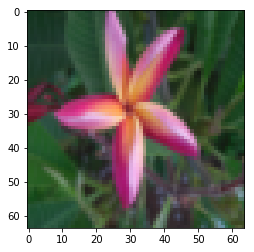

In [39]:
imagem = 16
test = plt.imshow(test_x[imagem])
print(test, "Cat: ",int(result[imagem,1]*100),"%   Non cat: ", int(result[imagem,0]*100),"%" )
print(result[imagem])
print(result[imagem,0])

In [91]:
from sklearn.metrics import confusion_matrix

y_true = test_y[0,:]
y_test = np.round(result[:,1])
cm = confusion_matrix(y_true, y_test)
print(cm)
acc = (cm[0,0] + cm[1,1]) / np.sum(cm)
print("Acurácia: ",acc)

[[15  2]
 [ 8 25]]
Acurácia:  0.8
